<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20221008.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* customer analysis
* iterator

In [3]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt
import seaborn as sns 
import re
import os 

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from functools import reduce
from collections import defaultdict

# customer analysis

In [4]:
os.listdir()

['.config',
 '1_order_payments_dataset.csv',
 'mall_customers.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'online_retail_II.xlsx',
 '1_orders_dataset.csv',
 '1_customers_dataset.csv',
 'scanner_data.csv',
 'test.csv',
 'ecommerce-data.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'sample_data']

In [5]:
df = pd.read_csv('mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.columns = [re.sub(' ', '_', re.sub(' \(.+\)$', '', a)).lower() for a in df.columns]
df.head()

,customerid,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
df.describe()

,customerid,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


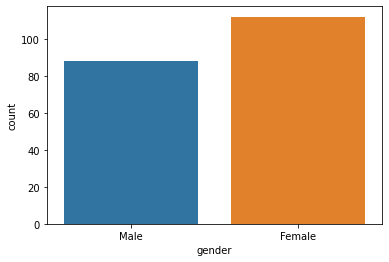

In [7]:
sns.countplot(data = df, x = 'gender')

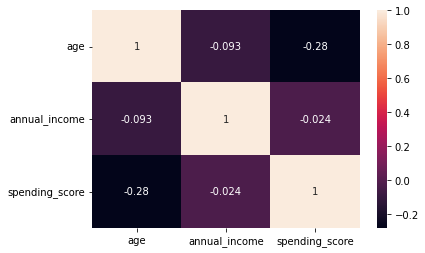

In [8]:
sns.heatmap(df[df.gender == 'Male'].drop(['customerid'], axis = 1).corr(), annot = True)

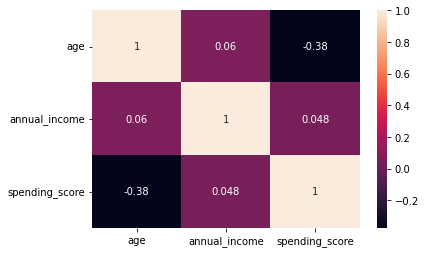

In [11]:
sns.heatmap(df[df.gender == 'Female'].drop(['customerid'], axis = 1).corr(), annot = True)

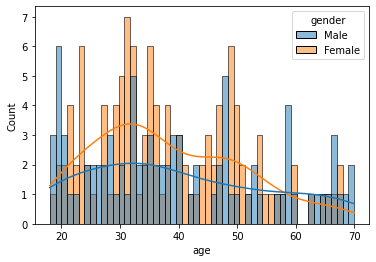

In [20]:
sns.histplot(data = df, x = 'age', hue = 'gender', kde = True, bins = 53)

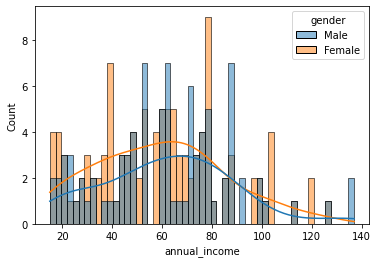

In [21]:
sns.histplot(data = df, x = 'annual_income', hue = 'gender', kde = True, bins = 53)

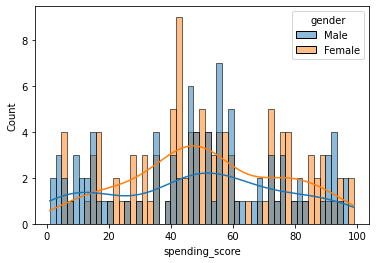

In [23]:
sns.histplot(data = df, x = 'spending_score', hue = 'gender', kde = True, bins = 53)

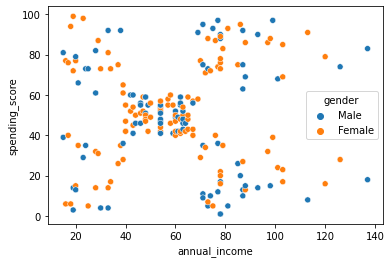

In [24]:
sns.scatterplot(data = df, x = 'annual_income', y = 'spending_score', hue = 'gender')

In [25]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df[['annual_income', 'spending_score']])

In [27]:
km = KMeans(n_clusters=5, random_state=10)
km.fit(df_std)
df['flag'] = km.fit_predict(df_std).astype(str)
df.head()

,customerid,gender,age,annual_income,spending_score,flag
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3


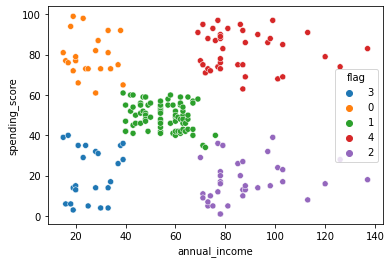

In [28]:
sns.scatterplot(data = df, x = 'annual_income', y = 'spending_score', hue = 'flag')

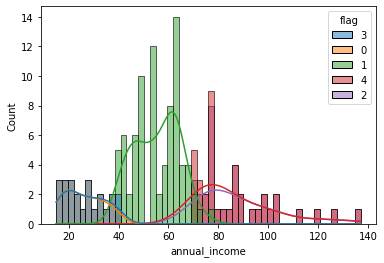

In [29]:
sns.histplot(data = df, x = 'annual_income', hue = 'flag', kde = True, bins = 52)

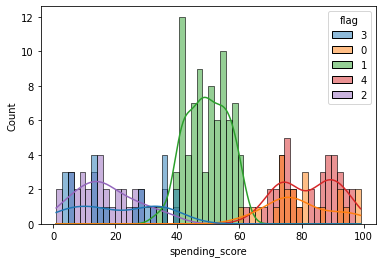

In [30]:
sns.histplot(data = df, x = 'spending_score', hue = 'flag', kde = True, bins = 52)

# iterator

In [32]:
mat = [list('ABC'), list('DEF'), list('GHI')]
a = {letter : [r, c] for r, rows in enumerate(mat) for c, letter in enumerate(rows)}

arr = np.empty([3,3], dtype = 'object')

for k, v in a.items() :
  arr[v[0], v[1]] = k

arr

array([['A', 'B', 'C'],
       ['D', 'E', 'F'],
       ['G', 'H', 'I']], dtype=object)

In [35]:
names = np.random.choice(['park', 'kim', 'lee'], 100, replace = True)

def get_score(names) :

  unique, counts = np.unique(names, return_counts=True)

  res = list()

  for i in range(len(unique)) :

    m = np.random.randint(35, 90, 1)
    s = np.random.randint(5, 30, 1)
    score = [a if a <= 100 else 100 for a in np.random.normal(m, s, counts[i])]

    res.append(pd.DataFrame({'names' : np.repeat(unique[i], counts[i]),
                             'score' : score}))

  return pd.concat(res)

wow = get_score(names)
wow.head()

,names,score
0,kim,78.723927
1,kim,59.528140
2,kim,90.208519
3,kim,99.474348
4,kim,97.476758


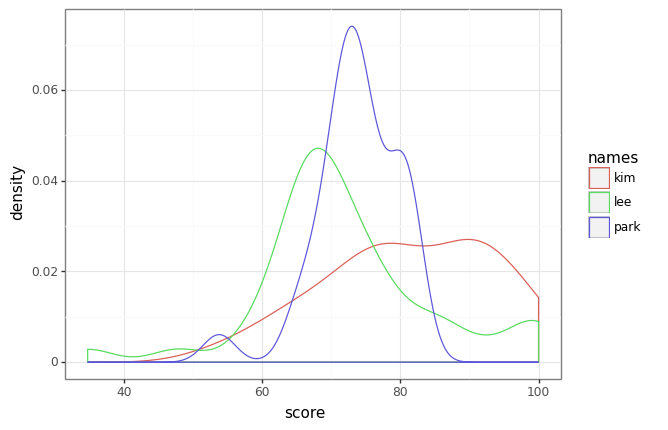

<ggplot: (8739344781369)>

In [38]:
(
    ggplot(wow, aes('score', color = 'names')) +
    gg.geom_density() +
    gg.theme_bw()
)

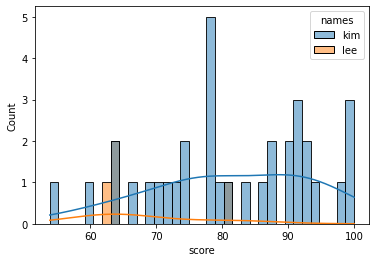

In [49]:
# sns.histplot(data = wow, x = 'score', hue = 'names', kde = True, bins = 50)
# sns.histplot(data = wow, x = 'score')
sns.histplot(data = wow[~wow.index.duplicated()], x = 'score', hue = 'names', kde = True, bins = 35)